<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una_12_WatsonToneAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project - creating a dataframe from analysed text data

For this project you are going to use the IBM Watson Tone Analyser API.  You will send text data to it, use security information stored in a config file to keep it secret, receive the results in JSON format, investigate the structure of the results and build a dataframe from them.

Then you will use the results to create a visualisation of tone and to report an overall set of statistics from the data.

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for [IBM Watson](https://cloud.ibm.com/registration?cm_mmc=dw-_-cognitive-_-topcoder-_-communityEducational1)
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

# Step 2 - add security to your worksheet to keep your apikey and url hidden

You can do this by using environment variables, which are stored in the operating system for this worksheet.

We will use a simplified system for storing the sensitive data so that it isn't visible in the worksheet:

1.  Ask for the api key to be input and store it in an environment variable called apikey

2.  Ask for the url to be input and store it in an environment variable

3.  Run the cell, type in the api key, then the url.  Once tis has been done.  Remove the output part of the cell.

In [ ]:
import os

# add the code to ask for the URL, then run this cell and when it has completed, remove the output (note: you will need to do this again if you return to the worksheet)
os.environ['APIKEY'] = input("Enter API key: ")
os.environ['URL'] = input("Enter URL: ")


# Install the ibm_watson libraries so that you can use their functions

In [ ]:
# install the ibm_watson libraries

!pip install ibm_watson

---

## Test to make sure it works

1.  Open this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing.  You will be able to copy and paste the text into here as needed.

2.  Get the environment variable for each of the two pieces of security information so that these do not need to be included in your notebook (have the keys available for copying and pasting).  To do this:

  ``` apikey = os.environ.get('APIKEY') ```

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your environment variables, then paste the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the environment variables you set
def get_secret(key):
    # add code here to get the keys from the environment variable and return the requested key
    # if there is an error print an error message and return None
    return os.environ.get(key)


    
def get_text_for_analysis():
    # add code here to input the text from the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    # return 'Team, I know that times are tough! Product sales have been disappointing for the past three quarters. We have a competitive product, but we need to do a better job of selling it!'
    return 'But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.'
     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('APIKEY'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('URL'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

# WORKING WITH THE OUTPUT OF TEXT ANALYSIS

### Watson Tone Analyser API Output
---

This is the output that the given text will produce. You will need to assign this output to a variable called **tone_analysis** in the function you are going to write below. 

```
{'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

```



### Use the code cell below to inspect the data
---
You might find it useful to use

```object.keys()```

In [3]:
def inspect_json_data(analysis_output):
  print(type(analysis_output))
  print(analysis_output.keys())
  print("document tone\t",analysis_output['document_tone'])
  for doc_item in analysis_output['document_tone']:
    print(doc_item)

  print("sentences tone\t",analysis_output['sentences_tone'])

tone_analysis = {'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}
inspect_json_data(tone_analysis)

<class 'dict'>
dict_keys(['document_tone', 'sentences_tone'])
document tone	 {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}
tones
sentences tone	 [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]


### Create (on paper) an idea of how this data might be organised into a data table

1.  How many bits of information are there about the document as a whole?

        6 bits of information, divided into two 2rows (one for each tone)
        toneid, score, tonename
2.  How many bits of information are there about each sentence?

        5 bit of info for each sentence 
        id, text, score, toneid, tone
        sentence with multiple tones would be entered twice (same id, text)

3.  If all tone analysis records were included in the dataframe, how many rows would there be?

        2 dataframes 
        1. doc
        toneid, score, tone_name
        2 rows (one for each tone)
        2. sentence
        id, text, score, toneid, tone
        4 rows (one for each sentence-tone combo


4.  What information would be included in each row?
        as listed in 3

### Create a dataframe and start to populate with the data

You can create a **dataframe** from this data either by converting it manually into a table OR by using the pandas function pd.json_normalise(data).  

**Manually**:

One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
```
 for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}
```
**Using pandas**:

An alternative way to do this would be to create a pandas dataframe from the sentences_tone data list (using `pd.json_normalise(data)`)

first iterate through and separate out - function "convert_to_df"

In [80]:


import pandas as pd
pd.set_option('display.max_columns', None)

def convert_to_df(mylist):
  df_to_return = pd.DataFrame()
  for row in mylist:
    # print("row\t",row)
    for tone in row['tones']:  #iterate through the tones: - I don't think I would have come up with this myself!
      # print(row['tones'])
      new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':tone['score'],'tone_id':tone['tone_id'],'tone_name':tone['tone_name']}
      # print(new_row)
      df_to_return = df_to_return.append(new_row, ignore_index=True)

  
  return df_to_return



# print("sentences tone\t",tone_analysis['sentences_tone'])
sentence_list = tone_analysis['sentences_tone']
print(sentence_list)
sentence_df = convert_to_df(sentence_list)
display(sentence_df)

[{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]


,sentence_id,text,tone_score,tone_id,tone_name
0,0.0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1.0,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1.0,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2.0,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


In [81]:
document_list = tone_analysis['document_tone']
print(document_list)
document_df = pd.DataFrame()
for row in document_list['tones']:
  # print(row)
  new_row={'tone_id':row['tone_id'],'tone_name':row['tone_name'],'tone_score':row['score']}
  # print(new_row)
  document_df = document_df.append(new_row, ignore_index=True)

display(document_df)  

{'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}


,tone_id,tone_name,tone_score
0,sadness,Sadness,0.582191
1,analytical,Analytical,0.829888


another approach - using the json normalise
and the explode method


In [93]:
import pandas as pd
import numpy as np

# convert json data to a dataframe with one row for each tone for each sentence
def convert_to_tones_table(data):
    # return the data normalized into a dataframe (pd.json_normalise(data))
    # the dataframe should have the columns: sentence_id, text, score, tone_id, tone_name
    df = pd.json_normalize(data)
    #explode the df - which col, ignore idx = true  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
    #then separate the column with the dict into separate cols
    df_exploded = df.explode('tones',ignore_index=True)
    # split_tones_df = df_exploded['tones'].apply(pd.Series) #create separate columns by exploding the tones column
    # display(split_tones_df)
    # split_final_df = pd.concat([df.drop(['b'], axis=1), df['b'].apply(pd.Series)], axis=1))
    # split_final_df = pd.concat([df_exploded.drop(['tones'],axis=1), split_tones_df], axis=1) # can do it all on one line
    split_final_df = pd.concat([df_exploded.drop(['tones'],axis=1), df_exploded['tones'].apply(pd.Series)], axis=1)
    # display(split_final_df)
    return  split_final_df
  

sentence_data = tone_analysis['sentences_tone']
print("sentences")
sentence_clean_df = convert_to_tones_table(sentence_data)
display(sentence_clean_df)
print("document")
document_list_df = convert_to_tones_table(document_list)
display(document_list_df)

# https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd



sentences


,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


document


,score,tone_id,tone_name
0,0.582191,sadness,Sadness
1,0.829888,analytical,Analytical


### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?

In [83]:
#most analytical - only for those with tone_id = analytical, find the max
def max_min_sentence(df,tone_to_check):
  # print(df,tone_to_check)
  max_analytical_df = df[df['tone_id']==tone_to_check].max()
  print("\nMost",tone_to_check,"sentence: \t")
  print(max_analytical_df['text'],"\nwith score: ",round(max_analytical_df['score'],3))
  min_analytical_df = df[df['tone_id']==tone_to_check].min()
  print("Least", tone_to_check, "sentence: \t")
  print(min_analytical_df['text'],"\nwith score: ",round(min_analytical_df['score'],3))
  avg_for_tone = round(df[df['tone_id']==tone_to_check].mean(),3)
  print("average = ", avg_for_tone['score'],"for ",tone_to_check)
  return

max_min_sentence(sentence_clean_df,'analytical')
max_min_sentence(sentence_clean_df,'sadness')


Most analytical sentence: 	
We have a competitive product, but we need to do a better job of selling it! 
with score:  0.802
Least analytical sentence: 	
Product sales have been disappointing for the past three quarters. 
with score:  0.507
average =  0.665 for  analytical

Most sadness sentence: 	
Product sales have been disappointing for the past three quarters. 
with score:  0.817
Least sadness sentence: 	
Product sales have been disappointing for the past three quarters. 
with score:  0.817
average =  0.817 for  sadness


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


plot the data

bar chart of average for each tone



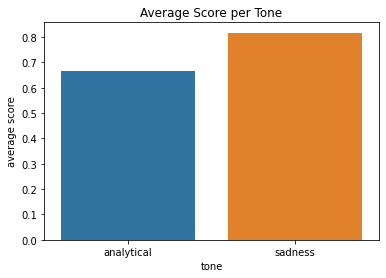

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_bar_from_df(df):
  avg_per_tone = df.groupby(['tone_id']).mean() # new df
  # display(avg_per_tone)
  yy = avg_per_tone['score']
  xx = avg_per_tone.index
  chart = sns.barplot(y=yy, x = xx)
  chart.set_ylabel('average score')
  chart.set_xlabel('tone')
  chart.set_title('Average Score per Tone')

  return 


plot_bar_from_df(sentence_clean_df)




### Challenging:  Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data

 ```pd.json_normalize(document_tone)```  

Display the document score for each of the tones in the analysis

### Change the text in the text file and analyse the new text.
---

Here is some alternative, happier text.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.

### The result of this analysis is below:

```
{'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
```

In [99]:
#run the same analysis on the new text
tone_analysis_new_text = {'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
sentence_list_new = tone_analysis_new_text['sentences_tone']





use first method of iterating through

In [100]:

new_sentence_df = convert_to_df(sentence_list_new)
display(new_sentence_df)

,sentence_id,text,tone_score,tone_id,tone_name
0,0.0,But I feel peaceful.,0.511185,joy,Joy
1,0.0,But I feel peaceful.,0.889390,tentative,Tentative
2,1.0,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2.0,Your future is assured.,0.977590,confident,Confident
4,3.0,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
5,3.0,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
6,6.0,The leaves will shake loose from the trees and...,0.621679,fear,Fear
7,7.0,"Christmas will come, and the snows of winter.",0.614764,joy,Joy
8,8.0,You will live to enjoy the beauty of the froze...,0.930779,joy,Joy
9,9.0,"Winter will pass, the days will lengthen, the ...",0.654012,sadness,Sadness


In [101]:
# use the json explode method
# end up with a column name of score instead of tone_score
new_sentence_clean_df = convert_to_tones_table(sentence_list_new)
new_sentence_clean_df.rename(columns ={0:'mess'}, inplace = True)
new_sentence_clean_df.drop(columns='mess',inplace=True)
display(new_sentence_clean_df)


,sentence_id,text,0,score,tone_id,tone_name
0,0,But I feel peaceful.,NaN,0.511185,joy,Joy
1,0,But I feel peaceful.,NaN,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",NaN,0.919911,joy,Joy
3,2,Your future is assured.,NaN,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",NaN,0.801827,analytical,Analytical
5,3,"You will live, secure and safe, Wilbur.",NaN,0.921250,confident,Confident
6,4,Nothing can harm you now.,NaN,NaN,NaN,NaN
7,5,These autumn days will shorten and grow cold.,NaN,NaN,NaN,NaN
8,6,The leaves will shake loose from the trees and...,NaN,0.621679,fear,Fear
9,7,"Christmas will come, and the snows of winter.",NaN,0.614764,joy,Joy


,sentence_id,text,score,tone_id,tone_name
0,0,But I feel peaceful.,0.511185,joy,Joy
1,0,But I feel peaceful.,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2,Your future is assured.,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
5,3,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
6,4,Nothing can harm you now.,NaN,NaN,NaN
7,5,These autumn days will shorten and grow cold.,NaN,NaN,NaN
8,6,The leaves will shake loose from the trees and...,0.621679,fear,Fear
9,7,"Christmas will come, and the snows of winter.",0.614764,joy,Joy


In [102]:
max_min_sentence(new_sentence_clean_df,'joy')
max_min_sentence(new_sentence_clean_df,'tentative')
max_min_sentence(new_sentence_clean_df,'confident')
max_min_sentence(new_sentence_clean_df,'analytical')
max_min_sentence(new_sentence_clean_df,'fear')
max_min_sentence(new_sentence_clean_df,'sadness')


Most joy sentence: 	
Your success in the ring this morning was, to a small degree, my success. 
with score:  0.939
Least joy sentence: 	
All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days. 
with score:  0.511
average =  0.753 for  joy

Most tentative sentence: 	
But I feel peaceful. 
with score:  0.889
Least tentative sentence: 	
But I feel peaceful. 
with score:  0.889
average =  0.889 for  tentative

Most confident sentence: 	
Your future is assured. 
with score:  0.978
Least confident sentence: 	
All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days. 
with score:  0.66
average =  0.853 for  confident

Most analytical sentence: 	
You will live, secure and safe, Wilbur. 
with score:  0.802
Least analytical sentence: 	
You will live, secure and safe, Wilbur. 
with score:  0.802
average =  0.802 for  analytical

Most fear sentence: 	
The leaves will shake loose from the tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


plot the outputs 


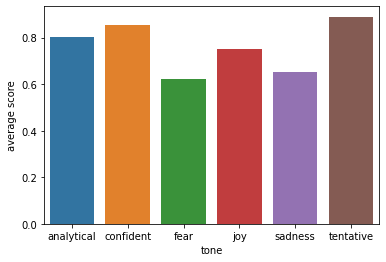

In [90]:
plot_bar_from_df(new_sentence_clean_df)

Reflection

it was interesting to use the tonal analysis

the structure was fairly complicated to unpack so I used two different approaches to help me to understand it better

using explode to split a column into multiple columns was very interesting